# Importing Dependencies 

In [1]:
import pandas as pd
import numpy as np
import glob
import soundfile
import os
import sys
from pydub import AudioSegment
from pydub.playback import play

import matplotlib.pyplot as plt

import warnings

import librosa
import librosa.display
import seaborn as sn


from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from IPython.display import Audio

from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 




C:\Users\hp\anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


# Loading the dataset

In [2]:
#loading the dataset from the "dataset folder and mapping them to obtain a pandas dataframe"
dataset_path = "C:/Users/hp/Downloads/Speech-Emotion-Recognization-master/Speech-Emotion-Recognization-master/dataset/"
dataDirectorylist = os.listdir(dataset_path)
Emotion=[]
path=[]
for dir in dataDirectorylist:
    actor = os.listdir(dataset_path+dir)
    for file in actor :
        part = file.split('.')[0]
        part = part.split('-')
        Emotion.append(int(part[2]))
        path.append(dataset_path+dir+'//'+file)
emotion_df = pd.DataFrame(Emotion,columns=['Emotions'])
emotion_df = emotion_df.Emotions.replace({1:'neutral',2: 'calm',3: 'happy',4: 'sad',5: 'angry',6: 'fearful',7: 'disgust',8: 'surprised'})

path_df = pd.DataFrame(path,columns=['Paths'])
dataset_dataframe = pd.concat([emotion_df,path_df],axis=1)

dataset_dataframe.head()


,Emotions,Paths
0,neutral,C:/Users/hp/Downloads/Speech-Emotion-Recogniza...
1,neutral,C:/Users/hp/Downloads/Speech-Emotion-Recogniza...
2,neutral,C:/Users/hp/Downloads/Speech-Emotion-Recogniza...
3,neutral,C:/Users/hp/Downloads/Speech-Emotion-Recogniza...
4,calm,C:/Users/hp/Downloads/Speech-Emotion-Recogniza...


In [3]:
#converting the data into a CSV file
dataset_dataframe = pd.concat([dataset_dataframe],axis=0)
dataset_dataframe.to_csv("data_path.csv",index=False)
dataset_dataframe.head
dataPath=pd.read_csv("data_path.csv")
print(dataPath)

       Emotions                                              Paths
0       neutral  C:/Users/hp/Downloads/Speech-Emotion-Recogniza...
1       neutral  C:/Users/hp/Downloads/Speech-Emotion-Recogniza...
2       neutral  C:/Users/hp/Downloads/Speech-Emotion-Recogniza...
3       neutral  C:/Users/hp/Downloads/Speech-Emotion-Recogniza...
4          calm  C:/Users/hp/Downloads/Speech-Emotion-Recogniza...
...         ...                                                ...
1435  surprised  C:/Users/hp/Downloads/Speech-Emotion-Recogniza...
1436  surprised  C:/Users/hp/Downloads/Speech-Emotion-Recogniza...
1437  surprised  C:/Users/hp/Downloads/Speech-Emotion-Recogniza...
1438  surprised  C:/Users/hp/Downloads/Speech-Emotion-Recogniza...
1439  surprised  C:/Users/hp/Downloads/Speech-Emotion-Recogniza...

[1440 rows x 2 columns]


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


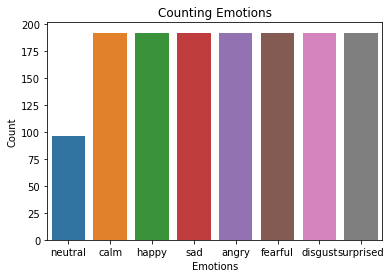

In [4]:
#Data Analysis on the data with the file and graphs
plt.title("Counting Emotions")
sn.countplot(dataPath.Emotions)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.show()

In [5]:
def waveplot(data,sr,e) :
    plt.figure(figsize=(10,3))
    librosa.display.waveshow(data,sr=sr,label=e)
    plt.title(e)
    plt.show()
    Audio(path)
    song = AudioSegment.from_wav(path)
    print('playing the emotion :',e)
    play(song)

# Data Visualization

EMOTION :  neutral
Chroma Visualization for the emotion:  neutral
Spectogram for the emotion  neutral


AttributeError: 'QuadMesh' object has no property 'x_axzis'

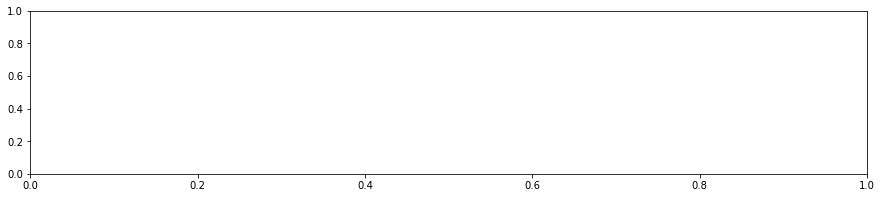

In [6]:
emotions_list=['neutral','calm','happy','sad','angry','fearful','disgust','surprised']
for emotion in emotions_list :
    print("EMOTION : ",emotion)
    print("Chroma Visualization for the emotion: ",emotion)
    print("Spectogram for the emotion ",emotion)
    df=dataPath
    
    path=np.array(df.Paths[df.Emotions==emotion])[4]
    
    x, sr = librosa.load(path)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(15, 3))
    librosa.display.specshow(Xdb, sr=sr, x_axzis='time', y_axis='hz')
    plt.colorbar()
    print("Zero Crossing rate for the emotion ",emotion)
    y, sr = librosa.load(path)
    zcrs = librosa.feature.zero_crossing_rate(y)
    print(f"Zero crossing rate: {sum(librosa.zero_crossings(y))}")
    plt.figure(figsize=(15, 3))
    plt.plot(zcrs[0])
    plt.title(emotion)
    data,samplingrate=librosa.load(path)
    waveplot(data,samplingrate,emotion)
    
    

In [ ]:
def noise(data) :
    noiseAmp=0.035*np.random.uniform()*np.amax(data)
    data = data+noiseAmp*np.random.normal(size=data.shape[0])
    return data
def stretch(data,rate=0.8) :
    return librosa.effects.time_stretch(data,rate)
def shift(data) :
    shiftrange=int(np.random.uniform(low=-5,high=5)*1000)
    return np.roll(data,shiftrange)
def pitch(data,samplingRate,pitchFactor=0.7) :
    return librosa.effects.pitch_shift(data,samplingRate,pitchFactor)


In [ ]:
x=noise(data)
plt.figure(figsize=(14,2))
librosa.display.waveshow(y=x,sr=samplingrate)
song = AudioSegment.from_wav(path)
print("Playing.......")
play(song)



In [ ]:
x=stretch(data)
plt.figure(figsize=(14,2))
librosa.display.waveshow(y=x,sr=samplingrate)
song = AudioSegment.from_wav(path)
print("Playing.......")
play(song)




In [ ]:
x=shift(data)
plt.figure(figsize=(14,2))
librosa.display.waveshow(y=x,sr=samplingrate)
song = AudioSegment.from_wav(path)
print("Playing.......")
play(song)



In [ ]:
x=pitch(data,samplingrate)
plt.figure(figsize=(14,2))
librosa.display.waveshow(y=x,sr=samplingrate)
song = AudioSegment.from_wav(path)
print("Playing.......")
play(song)


# Feature Extraction

In [ ]:
def extract_feature(file_name, **kwargs):
    mfcc = kwargs.get("mfcc")
    chroma = kwargs.get("chroma")
    mel = kwargs.get("mel")
    contrast = kwargs.get("contrast")
    tonnetz = kwargs.get("tonnetz")
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate
        if chroma or contrast:
            stft = np.abs(librosa.stft(X))
        result = np.array([])
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result = np.hstack((result, mfccs))
        if chroma:
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result = np.hstack((result, chroma))
        if mel:d
            mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result = np.hstack((result, mel))
        if contrast:
            contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
            result = np.hstack((result, contrast))
        if tonnetz:
            tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
            result = np.hstack((result, tonnetz))
    return result

In [ ]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

In [ ]:
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("dataset//Actor_*//*.wav"):
        print(file,end="")
        filename=os.path.basename(file)
        emotion=emotions[(filename.split("-")[2])]
        print("",emotion)
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

In [ ]:
x_train,x_test,y_train,y_test=load_data(test_size=0.25)
print(x_train.shape)

In [ ]:
print(x_train.shape)
print(x_test.shape)

In [ ]:
print("Number of training samples:", x_train.shape[0])
print(" Number of testing samples:", x_test.shape[0])

# MLP Classifier

In [ ]:
myclassifier=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)
myclassifier.fit(x_train,y_train)

In [ ]:
expected_y=y_test
actual_y=myclassifier.predict(x_test)
print(metrics.confusion_matrix(expected_y,actual_y))
print(accuracy_score(y_true=y_test,y_pred=dtree_predictions))
print(classification_report(expected_y,actual_y))

In [ ]:
cm = confusion_matrix(expected_y,actual_y)
cm_df = pd.DataFrame(cm,index = ['Angry','Calm','Disgust','Fearful','Happy','Neutral','Sad','Surprised'], columns = ['Angry','Calm','Disgust','Fearful','Happy','Neutral','Sad','Surprised'])
plt.figure(figsize=(5,4))
sn.heatmap(cm_df,annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# Decision Tree Classifier 

In [ ]:
dtree_model = DecisionTreeClassifier(max_depth = 6).fit(x_train, y_train) 
dtree_predictions = dtree_model.predict(x_test) 
print(accuracy_score(y_true=y_test,y_pred=dtree_predictions))
print(classification_report(y_test,dtree_predictions)) 
print(confusion_matrix(y_test, dtree_predictions) )

# Support Vector Classifier

In [ ]:
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(x_train, y_train) 
svm_predictions = svm_model_linear.predict(x_test) 
print(accuracy_score(y_true=y_test,y_pred=svm_predictions))
print(classification_report(y_test,svm_predictions)) 
print(confusion_matrix(y_test, svm_predictions) )

# Random Forest Classifier 

In [ ]:
classifier = RandomForestClassifier(n_estimators = 100, random_state = 0) 
classifier.fit(x_train, y_train)   
c_p = classifier.predict(x_test) 
print(accuracy_score(y_true=y_test,y_pred=c_p))
print(classification_report(y_test,c_p)) 
print(confusion_matrix(y_test,c_p) )